In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


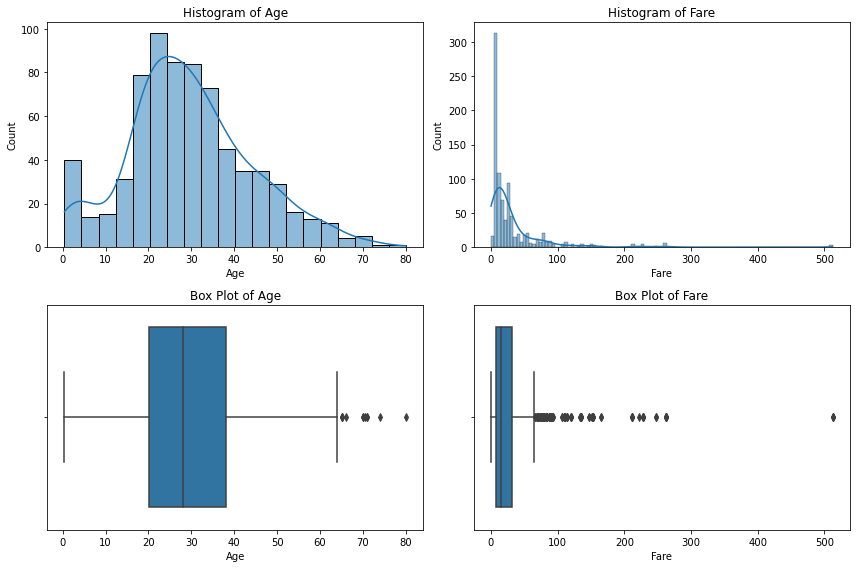

In [3]:
features = ['Age', 'Fare']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Generate and display histograms
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.histplot(data=data, x=feature, ax=axes[row][col], kde=True)
    axes[row][col].set_title(f'Histogram of {feature}')

# Generate and display box plots
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.boxplot(data=data, x=feature, ax=axes[row+1][col])
    axes[row+1][col].set_title(f'Box Plot of {feature}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Male & Female Distribution according to age group [Box plot] 

<AxesSubplot:xlabel='Age', ylabel='Sex'>

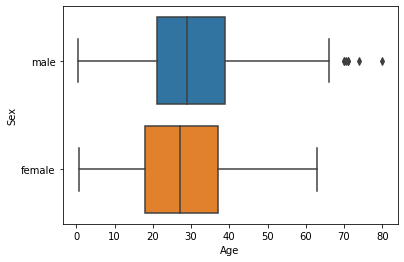

In [5]:
sns.boxplot(data=data, x="Age", y="Sex")

# age distribution of male and female passengers who survived

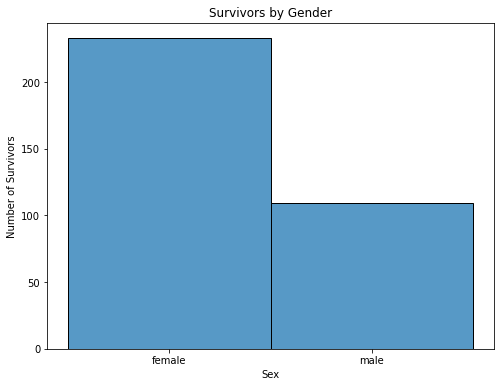

In [6]:
survived_data = data[data['Survived'] == 1]

# Create a histogram (histplot) to visualize the number of males and females who survived
plt.figure(figsize=(8, 6))
sns.histplot(data=survived_data, x='Sex', kde=False, bins=2)
plt.title('Survivors by Gender')
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')

# Show the plot
plt.show()

# Age Distribution with respective Gender

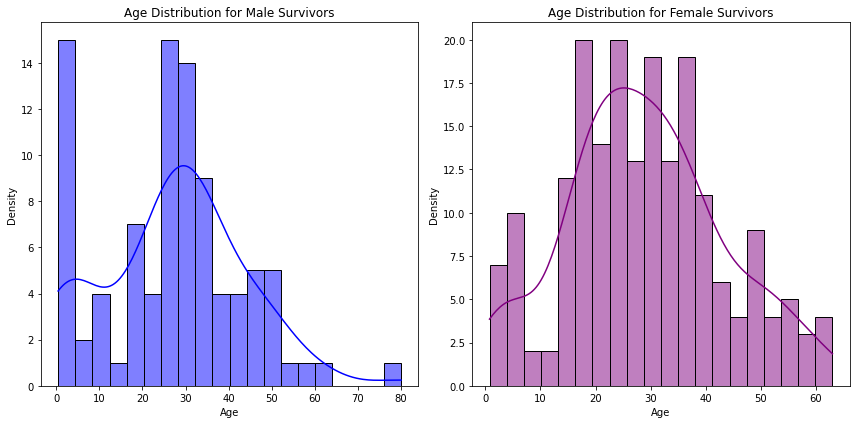

In [13]:
male_survivors = data[(data['Survived'] == 1) & (data['Sex'] == 'male')]
female_survivors = data[(data['Survived'] == 1) & (data['Sex'] == 'female')]

# Create two KDE plots to visualize the age distribution for males and females
plt.figure(figsize=(12, 6))

# KDE plot for males
plt.subplot(1, 2, 1)
sns.histplot(data=male_survivors, x='Age', kde=True, bins=20, color='blue')
plt.title('Age Distribution for Male Survivors')
plt.xlabel('Age')
plt.ylabel('Density')

# KDE plot for females
plt.subplot(1, 2, 2)
sns.histplot(data=female_survivors, x='Age', kde=True, bins=20, color='purple')
plt.title('Age Distribution for Female Survivors')
plt.xlabel('Age')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Feature Engineering 

In [14]:
# Feature Engineering
# Extract titles from passenger names
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')

# Create a FamilySize feature
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Age Imputation
data['Age'].fillna(data['Age'].median(), inplace=True)

In [15]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Feature selection
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs']


In [19]:
from sklearn.ensemble import RandomForestClassifier
# Split data into training and testing sets
X = data[features]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.8379888268156425
Cross-Validation Mean Accuracy: 0.8058251208335949
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



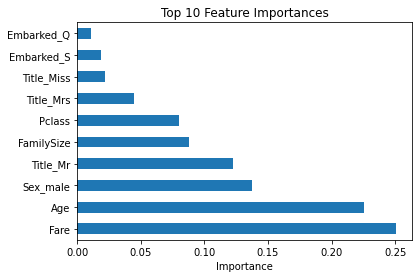

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
# Model evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cross_val = np.mean(cross_val_score(clf, X, y, cv=5))

# Print model evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Cross-Validation Mean Accuracy: {cross_val}')
print(classification_report(y_test, y_pred))

# Feature Importance Analysis
feature_importance = pd.Series(clf.feature_importances_, index=features)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.show()